In [1]:
import numpy as np
import pandas as pd

importing data

In [2]:
df=pd.read_csv('D:/Research Work/road/attacks/max_engine_coolant_temp_attack.log')
df.head()

,(1090000000.000000) can0 033#000780000F0007D0
0,(1090000000.000001) can0 162#00080003EA11F4CE
1,(1090000000.000002) can0 0A7#2010FA24D125C0A0
2,(1090000000.000997) can0 32D#00000424CC010000
3,(1090000000.002018) can0 576#7FF800003FFC1FC0
4,(1090000000.005084) can0 193#00080803E6E80000


sliting the data into different columns

In [3]:
log_data  = open('D:/Research Work/road/attacks/max_engine_coolant_temp_attack.log', 'r')
split_list = []

for line in log_data:
    thing1 = line.split(' ')
    time = thing1[0][1:18]
    idd = thing1[1][:4]
    message = thing1[2][:20]
    

    split_list.append([time, idd, message])

df1 = pd.DataFrame(split_list, columns=['Unix Timestamp', 'Channel', 'IDHexandDataFeild'])
#df1['Message'].map(str.strip)
df1

,Unix Timestamp,Channel,IDHexandDataFeild
0,1090000000.000000,can0,033#000780000F0007D0
1,1090000000.000001,can0,162#00080003EA11F4CE
2,1090000000.000002,can0,0A7#2010FA24D125C0A0
3,1090000000.000997,can0,32D#00000424CC010000
4,1090000000.002018,can0,576#7FF800003FFC1FC0
...,...,...,...
61918,1090000025.873534,can0,FFF#0000000000000000
61919,1090000025.873535,can0,3E4#0134000005000000
61920,1090000025.873536,can0,65C#4011D26750000000
61921,1090000025.874552,can0,577#0000080000000146


spliting idhex and dataframe in out variable

In [4]:
out = pd.DataFrame(df1.IDHexandDataFeild.str.split('#',1).tolist(),columns=['IDhex','DataFrame'])
out.head()

,IDhex,DataFrame
0,033,000780000F0007D0
1,162,00080003EA11F4CE
2,0A7,2010FA24D125C0A0
3,32D,00000424CC010000
4,576,7FF800003FFC1FC0


get unixtimestamp and Channel column

In [5]:
df2=df1[['Unix Timestamp', 'Channel']] 
df2.head()

,Unix Timestamp,Channel
0,1090000000.000000,can0
1,1090000000.000001,can0
2,1090000000.000002,can0
3,1090000000.000997,can0
4,1090000000.002018,can0


In [6]:
out['IDhex'] = out['IDhex'].apply(lambda x: int(x,16))
out

,IDhex,DataFrame
0,51,000780000F0007D0
1,354,00080003EA11F4CE
2,167,2010FA24D125C0A0
3,813,00000424CC010000
4,1398,7FF800003FFC1FC0
...,...,...
61918,4095,0000000000000000
61919,996,0134000005000000
61920,1628,4011D26750000000
61921,1399,0000080000000146


In [7]:
out['DataFrame'] = out['DataFrame'].apply(lambda x: int(x,16))
out

,IDhex,DataFrame
0,51,2111062576990160
1,354,2251816625632462
2,167,2310621644875743392
3,813,4556087951360
4,1398,9221120238114578368
...,...,...
61918,4095,0
61919,996,86694292910768128
61920,1628,4616702434197110784
61921,1399,8796093022534


In [8]:
frames=[df2,out]
result=pd.concat(frames ,axis=1)
result.head()

,Unix Timestamp,Channel,IDhex,DataFrame
0,1090000000.000000,can0,51,2111062576990160
1,1090000000.000001,can0,354,2251816625632462
2,1090000000.000002,can0,167,2310621644875743392
3,1090000000.000997,can0,813,4556087951360
4,1090000000.002018,can0,1398,9221120238114578368


In [9]:
#here i have saved my data which i have splitted and  converted in decimal 
save=result.to_csv("D:/Research Work/road/extractedfrompython/speedometer.csv")

In [10]:
result.shape

(61923, 4)

In [11]:
result = result.loc[:, ~result.columns.str.contains('^Channel')]

result

,Unix Timestamp,IDhex,DataFrame
0,1090000000.000000,51,2111062576990160
1,1090000000.000001,354,2251816625632462
2,1090000000.000002,167,2310621644875743392
3,1090000000.000997,813,4556087951360
4,1090000000.002018,1398,9221120238114578368
...,...,...,...
61918,1090000025.873534,4095,0
61919,1090000025.873535,996,86694292910768128
61920,1090000025.873536,1628,4616702434197110784
61921,1090000025.874552,1399,8796093022534


In [12]:
import matplotlib.pyplot as plt
import pandas as pd

Split data into 2 chunks

In [13]:
n =21000  #chunk row size
list_df = [result[i:i+n]
for i in range(0,result.shape[0],n)]


selcting first chunk and spliting it into dependent and independent variable

In [14]:
res=list_df[0]
res1=list_df[1]
res1=list_df[2]
res1


,Unix Timestamp,IDhex,DataFrame
42000,1090000017.566274,526,5629503522824245239
42001,1090000017.566275,1314,16104819493026398236
42002,1090000017.567268,870,9321826714663767608
42003,1090000017.567270,1408,16542859264
42004,1090000017.567271,1076,65021430800414160
...,...,...,...
61918,1090000025.873534,4095,0
61919,1090000025.873535,996,86694292910768128
61920,1090000025.873536,1628,4616702434197110784
61921,1090000025.874552,1399,8796093022534


In [15]:
X = res.iloc[:, :3].values
y = res.iloc[:, 2].values
print(X,y)

[['1090000000.000000' 51 2111062576990160]
 ['1090000000.000001' 354 2251816625632462]
 ['1090000000.000002' 167 2310621644875743392]
 ...
 ['1090000008.781181' 167 2310621369997979808]
 ['1090000008.781182' 1459 288230376151738368]
 ['1090000008.784827' 692 306541642801461248]] [   2111062576990160    2251816625632462 2310621644875743392 ...
 2310621369997979808  288230376151738368  306541642801461248]


In [16]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Without hyperperameter tunning

In [17]:
from sklearn import metrics
model= RandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('Accuracy From Random Forest: ', accuracy_score(y_test, prediction))


Accuracy From Random Forest:  0.5763492063492064


In [18]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

prediction=knn1.predict(X_test)

print('Accuracy From KNN: ', accuracy_score(y_test, prediction))



Accuracy From KNN:  0.7677777777777778


In [22]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
prediction=DT.predict(X_test)
print('Accuracy DEcision Tree: ', accuracy_score(y_test, prediction))  




Accuracy DEcision Tree:  0.5774603174603175


In [19]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Hyperperameter tunning

All Accuracies:  [0.77428571 0.78285714 0.79428571 0.77714286 0.79047619 0.7752381
 0.7847619  0.80380952 0.80666667 0.79428571 0.79047619 0.77142857
 0.78571429 0.79142857 0.79428571 0.78666667 0.78666667 0.77142857
 0.77809524 0.75714286] 

Mean of all Accuracies:  0.7848571428571429 

Standard Deviation:  0.011526957460636337


Text(0, 0.5, 'Cross-Validated Accuracy')

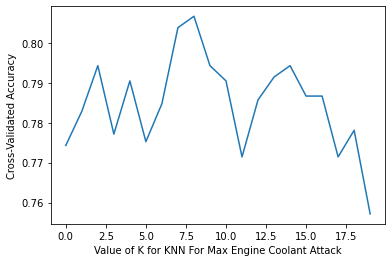

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, X, y, cv=20, scoring='accuracy')
print('All Accuracies: ', scores, '\n')

print('Mean of all Accuracies: ', scores.mean(), '\n')
print('Standard Deviation: ', scores.std())

plt.plot(scores)
plt.xlabel('Value of K for KNN For Max Engine Coolant Attack')
plt.ylabel('Cross-Validated Accuracy')


All Accuracies:  [0.67619048 0.68666667 0.6952381  0.69619048 0.72       0.70761905
 0.70761905 0.70571429 0.69904762 0.70095238 0.69142857 0.69809524
 0.6847619  0.67904762 0.68380952 0.6847619  0.68952381 0.66857143
 0.68095238 0.66761905] 

Mean of all Accuracies:  0.6911904761904761 

Standard Deviation:  0.013288615487976965


Text(0, 0.5, 'Cross-Validated Accuracy')

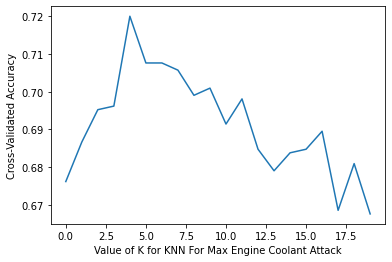

In [21]:
knn = KNeighborsClassifier(n_neighbors=10)

scores = cross_val_score(knn, X, y, cv=20, scoring='accuracy')
print('All Accuracies: ', scores, '\n')

print('Mean of all Accuracies: ', scores.mean(), '\n')
print('Standard Deviation: ', scores.std())

plt.plot(scores)
plt.xlabel('Value of K for KNN For Max Engine Coolant Attack')
plt.ylabel('Cross-Validated Accuracy')


# Decision Tree

All Accuracies:  [0.58231293 0.59863946 0.6        0.59047619 0.59863946 0.59047619
 0.59591837 0.6        0.58095238 0.59591837 0.59047619 0.58231293
 0.60544218 0.61904762 0.58367347 0.57687075 0.59727891 0.58911565
 0.58231293 0.58639456] 

Mean of all Accuracies:  0.5923129251700681 

Standard Deviation:  0.009832462071115974


Text(0, 0.5, 'Cross-Validated Accuracy')

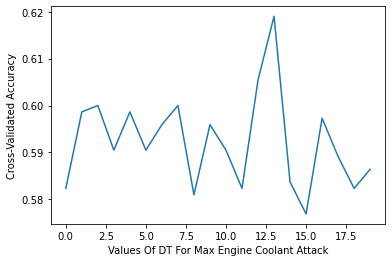

In [23]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

classifier = DecisionTreeClassifier(criterion ="entropy", splitter ="random", max_depth =5,  min_samples_split =5,
                              min_samples_leaf =2, max_features =2)

all_accuracies = cross_val_score(estimator=DT, X=X_train, y=y_train, cv=20)

print('All Accuracies: ', all_accuracies, '\n')

print('Mean of all Accuracies: ', all_accuracies.mean(), '\n')
print('Standard Deviation: ', all_accuracies.std())

plt.plot(all_accuracies)
plt.xlabel('Values Of DT For Max Engine Coolant Attack')
plt.ylabel('Cross-Validated Accuracy')


# Random Forest

All Accuracies:  [0.41632653 0.40952381 0.45034014 0.37823129 0.42993197 0.41360544
 0.46394558 0.39863946 0.42585034 0.44353741 0.40816327 0.40680272
 0.41632653 0.44761905 0.37959184 0.40408163 0.39863946 0.42040816
 0.45306122 0.38231293] 

Mean of all Accuracies:  0.41734693877551016 

Standard Deviation:  0.02419656267407437


Text(0, 0.5, 'Cross-Validated Accuracy')

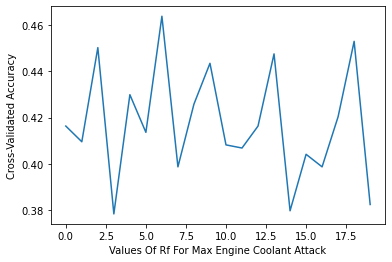

In [24]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

classifier = RandomForestClassifier(n_estimators=2, random_state=0)

all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=20)

print('All Accuracies: ', all_accuracies, '\n')

print('Mean of all Accuracies: ', all_accuracies.mean(), '\n')
print('Standard Deviation: ', all_accuracies.std())

plt.plot(all_accuracies)
plt.xlabel('Values Of Rf For Max Engine Coolant Attack')
plt.ylabel('Cross-Validated Accuracy')


In [1]:
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score





In [ ]:
#svm_m=SVC()
#svm_m.fit(X_train,y_train)
#prediction=svm_m.predict(X_test)
#print('Accuracy: ', accuracy_score(y_test, prediction), '\n')

